## Set up

In [2]:
import os 
base_dir = os.path.normpath(os.getcwd() + os.sep + os.pardir)

In [1]:
import requests # request img from web
import shutil # save img locally
from pathlib import Path
from PIL import Image
import math
import matplotlib.pyplot as plt

## Download and partition images from OpenAI microscope mixed4e55 imagenet and flickr maximally activating dataset samples

In [10]:
mixed4e55_imagenet_url = 'https://oaiggoh.blob.core.windows.net/microscopeprod/2020-07-25/2020-07-25/inceptionv1/lucid.dataset_examples/_dataset_examples/dataset%3Dimagenet%26op%3Dmixed4e_1x1%253A0/channel_55_40.png'
mixed4e55_flickr_url = 'https://oaiggoh.blob.core.windows.net/microscopeprod/2020-07-25/2020-07-25/inceptionv1/lucid.dataset_examples/_dataset_examples/dataset%3Dyfcc%26op%3Dmixed4e_1x1%253A0/channel_55_40.png'

mixed4e55_imagenet_file = base_dir / "data/test-images/mixed4e55_imagenet_file.png"
mixed4e55_flickr_file = base_dir / "data/test-images/mixed4e55_flickr_file.png"

In [13]:
mixed4e55_imagenet_res = requests.get(mixed4e55_imagenet_url, stream = True)
mixed4e55_flickr_res = requests.get(mixed4e55_flickr_url, stream = True)

if mixed4e55_imagenet_res.status_code == 200:
    with open(mixed4e55_imagenet_file,'wb') as f:
        shutil.copyfileobj(mixed4e55_imagenet_res.raw, f)
    print('Image sucessfully Downloaded: ', mixed4e55_imagenet_file)

if mixed4e55_flickr_res.status_code == 200:
    with open(mixed4e55_flickr_file,'wb') as f:
        shutil.copyfileobj(mixed4e55_flickr_res.raw, f)
    print('Image sucessfully Downloaded: ', mixed4e55_flickr_file)

Image sucessfully Downloaded:  /mnt/c/Users/lauraa.omahony/Documents/~PhD_Stuff/1_Workspace/sw-interpretability/data/mixed4e55_imagenet_file.png
Image sucessfully Downloaded:  /mnt/c/Users/lauraa.omahony/Documents/~PhD_Stuff/1_Workspace/sw-interpretability/data/mixed4e55_flickr_file.png


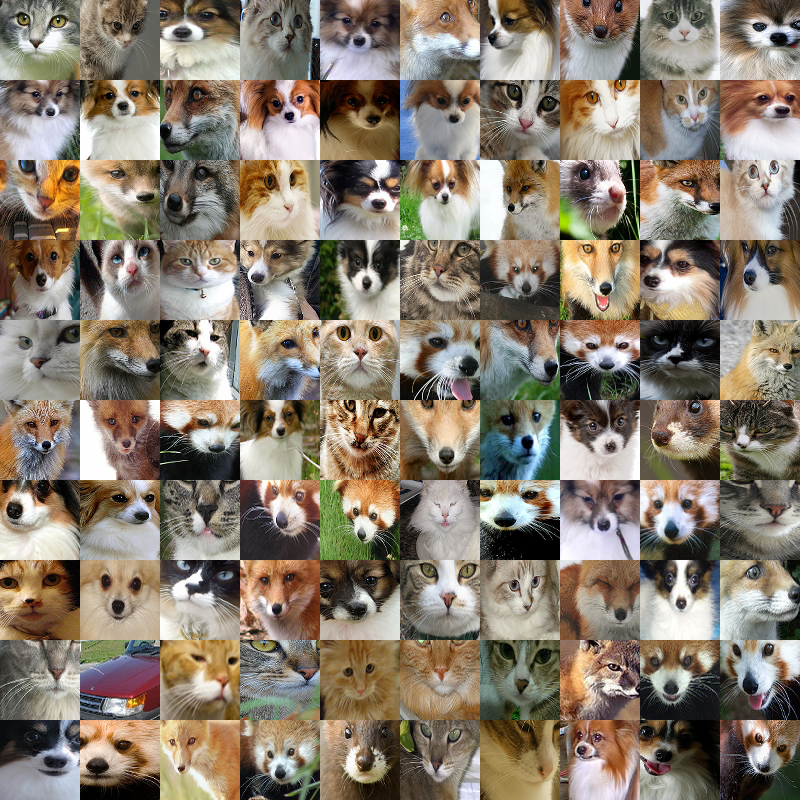

In [14]:
mixed4e55_imagenet_im = Image.open(mixed4e55_imagenet_file)
mixed4e55_imagenet_im

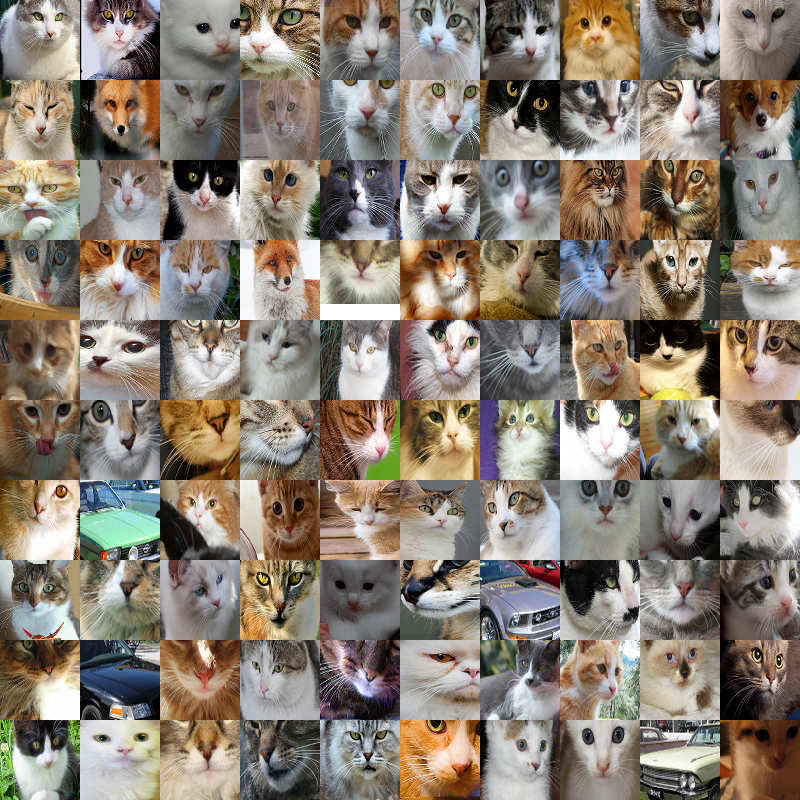

In [15]:
mixed4e55_flickr_im = Image.open(mixed4e55_flickr_file)
mixed4e55_flickr_im

In [16]:
mixed4e55_imagenet_data = np.asarray(mixed4e55_imagenet_im)
mixed4e55_flickr_data = np.asarray(mixed4e55_flickr_im)
mixed4e55_flickr_im.size # (800, 800)
mixed4e55_flickr_data.shape # (800, 800, 4)

(800, 800, 4)

In [26]:
os.mkdir(f"{base_dir}/data/test-images/mixed4e55_imagenet") 
os.mkdir(f"{base_dir}/data/test-images/mixed4e55_flickr") 

In [30]:
N=10.0
M=10.0
mixed4e55_imagenet_tiles = np.zeros((int(N*M),math.ceil(mixed4e55_imagenet_data.shape[0]/N), math.ceil(mixed4e55_imagenet_data.shape[1]/M), mixed4e55_imagenet_data.shape[2]))
mixed4e55_flickr_tiles = np.zeros((int(N*M),math.ceil(mixed4e55_flickr_data.shape[0]/N), math.ceil(mixed4e55_flickr_data.shape[1]/M), mixed4e55_flickr_data.shape[2]))
# print(tiles.shape) # (100, 80, 80, 4)
c = 0
for i in range(0, mixed4e55_imagenet_data.shape[0], math.ceil(mixed4e55_imagenet_data.shape[0]/N)):  
    for j in range(0, mixed4e55_imagenet_data.shape[1], math.ceil(mixed4e55_imagenet_data.shape[1]/M)):
        mixed4e55_imagenet_tiles[c] = mixed4e55_imagenet_data[i:i+math.ceil(mixed4e55_imagenet_data.shape[0]/N), j:j+math.ceil(mixed4e55_imagenet_data.shape[1]/M), :]
        plt.imsave(f'{base_dir}/data/test-images/mixed4e55_imagenet/mixed4e55_imagenet_im_{c}.png', mixed4e55_imagenet_tiles[c]/255.)
        c += 1
        
c = 0
for i in range(0, mixed4e55_flickr_data.shape[0], math.ceil(mixed4e55_flickr_data.shape[0]/N)):  
    for j in range(0, mixed4e55_flickr_data.shape[1], math.ceil(mixed4e55_flickr_data.shape[1]/M)):
        mixed4e55_flickr_tiles[c] = mixed4e55_flickr_data[i:i+math.ceil(mixed4e55_flickr_data.shape[0]/N), j:j+math.ceil(mixed4e55_flickr_data.shape[1]/M), :]
        plt.imsave(f'{base_dir}/data/test-images/mixed4e55_flickr/mixed4e55_flickr_im_{c}.png', mixed4e55_flickr_tiles[c]/255.)
        c += 1